# Ejemplo de clasificación binaria

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook muestra la creación de modelos predictivos para variable discreta usando algoritmos de clasificación.

Las métricas usadas en este modelo de clasificación son:

+ accuracy
+ precision_score
+ recall
+ F1 score
+ matriz de confusión
+ roc_auc
---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (>=1.1.0)
- numpy (1.26.4)
- matplotlib (3.7.1)
- seaborn (0.13.1)
- sklearn (1.3.2)

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import sklearn
print(sklearn.__version__)
````

# Métricas

## ***1. F1-score***
Es una métrica que se utiliza para evaluar el rendimiento de un modelo de clasificación, especialmente en problemas con clases desbalanceadas. Es la media armónica entre la **precisión** (precision) y la **sensibilidad** (recall), y se interpreta de la siguiente manera:

1. **Componentes principales**:
   - **Precisión (Precision)**: Es la proporción de verdaderos positivos (predicciones correctas de la clase positiva) sobre el total de predicciones positivas (verdaderos positivos + falsos positivos). Mide la exactitud de las predicciones positivas del modelo.
   - **Sensibilidad (Recall)** o **Tasa de verdaderos positivos**: Es la proporción de verdaderos positivos sobre el total de casos positivos reales (verdaderos positivos + falsos negativos). Indica qué tan bien el modelo captura todas las instancias positivas.

2. **Cálculo del F1-score**:
   
   $F1score = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

   La fórmula es una media armónica que da igual importancia tanto a la precisión como a la sensibilidad. El resultado estará en el rango de 0 a 1, donde un valor más alto indica un mejor rendimiento.

3. **Interpretación**:
   - **F1-score cercano a 1**: Indica un buen equilibrio entre precisión y sensibilidad, es decir, el modelo tiene tanto una alta precisión como un buen recall.
   - **F1-score bajo**: Indica un mal equilibrio, sugiriendo que el modelo tiene problemas con la precisión o la sensibilidad, o ambos.
   - **Adecuado para datos desbalanceados**: El F1-score es especialmente útil cuando las clases están desbalanceadas, ya que considera tanto los falsos positivos como los falsos negativos.

4. **Usos comunes**:
   - Es una métrica recomendada cuando se busca un equilibrio entre precisión y sensibilidad, y especialmente cuando es importante evitar tanto falsos positivos como falsos negativos.
   - Puede ser utilizado para comparar modelos de clasificación y seleccionar el que ofrezca el mejor equilibrio entre estas dos métricas.

En resumen, el **F1-score** ayuda a entender cómo se desempeña un modelo de clasificación en términos de precisión y sensibilidad combinadas, y es especialmente valioso en problemas donde los errores tienen diferentes costos o hay un desbalance en las clases.

## ***2. ROC AUC***
El valor de **ROC AUC** (Receiver Operating Characteristic - Area Under the Curve) en clasificación mide la capacidad de un modelo para distinguir entre clases positivas y negativas. La interpretación es la siguiente:

1. **Definición básica**:
   - El **ROC** es una curva que muestra la relación entre la **tasa de verdaderos positivos** (TPR, o sensibilidad) y la **tasa de falsos positivos** (FPR) a medida que varía el umbral de decisión del modelo.
   - El **AUC (Area Under the Curve)** mide el área bajo esta curva. Es un valor que va de 0 a 1 y resume el rendimiento del modelo en un solo número.

2. **Interpretación del valor de AUC**:
   - **AUC = 1.0**: indica un modelo perfecto. El modelo es capaz de distinguir correctamente todas las instancias positivas de las negativas sin errores.
   - **AUC = 0.5**: indica un modelo que no tiene capacidad para clasificar mejor que el azar. La curva ROC sería una línea diagonal, lo que sugiere que el modelo no tiene poder discriminante.
   - **0.5 < AUC < 1.0**: cuanto más cerca esté de 1, mejor es el modelo para discriminar entre las clases. Un AUC más alto indica un mejor rendimiento del modelo en la clasificación de casos positivos frente a negativos.
   - **AUC < 0.5**: sugiere que el modelo tiene un desempeño peor que el azar y podría estar etiquetando incorrectamente las clases.

3. **Uso en la práctica**:
   - Un AUC más alto significa que, en promedio, el modelo asigna una probabilidad mayor a las instancias positivas que a las negativas.
   - Se utiliza para comparar diferentes modelos de clasificación; un modelo con un AUC más alto se considera mejor.

En resumen, el **ROC AUC** evalúa qué tan bien el modelo clasifica los casos positivos frente a los negativos, y un valor más alto indica un mejor desempeño.


# Preparación del entorno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error

from sklearn.pipeline import Pipeline
from operator import itemgetter

import warnings
warnings.filterwarnings('ignore')

# Fase 2 - Comprensión de los datos

## Carga de la data

In [ ]:
!wget https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv

--2024-10-29 01:22:11--  https://www.dropbox.com/s/gvxf9ztdy59n1gp/heart.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel [following]
--2024-10-29 01:22:11--  https://www.dropbox.com/scl/fi/2t4hm96h5yqtoe3zu0mlz/heart.csv?rlkey=rtrmj1ym0ltm76z165e0c3uel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf65b37d9c9b4daa7f398d15a6.dl.dropboxusercontent.com/cd/0/inline/CdV7wWME6xClbN_8ezpmwDRQxQWfhDGnLuk_W8paeTNSjtUwDaF6Ee1HyDjtc4hKwg9InZwMXKssFaRkhGOWwnYlmg7Cu82XIdWlsYE3kgfpeht20X13deNpGs6LnSN2MDctPOMldooRmBmMfyPHJ7M9/file# [following]
--2024-10-29 01:22:12--  https://ucbf65b37d9c9b4daa7f398d15a6.dl.dropboxusercontent.com/cd/0/inline/CdV7wWME6x

In [ ]:
data_heart = pd.read_csv("heart.csv")
data_heart.shape

(303, 14)

---


$\textbf{COMENTARIO}$


---


Existen 303 observaciones que corresponden a 303 pacientes de los cuales se tienen 14 características o variables.

## Descripción de la data

+ Age : Age of the patient
+ Sex : Sex of the patient
+ exang: exercise induced angina (1 = yes; 0 = no)
+ caa: number of major vessels (0-3)
+ cp : Chest Pain type chest pain type
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
    + Value 4: asymptomatic
+ trtbps : resting blood pressure (in mm Hg)
+ chol : cholestoral in mg/dl fetched via BMI sensor
+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
+ thalach : maximum heart rate achieved
+ oldpeak : ST depression induced by exercise relative to rest
+ thall : thalassemia (Enfermedad sanguínea caracterizada por cantidades inferiores a las normales de una proteína transportadora de oxígeno)
    + 0 : null
    + 1 : fixed defec
    + 2 : normal
    + 3 : reversable defect
+ slp : the slope of the peak exercise ST segment
    + 0 : unsloping
    + 1 : flat
    + 2 : downsloping
+ output : 0= less chance of heart attack 1= more chance of heart attack
    + 0 : 50% diameter narrowing. less chance of heart disease
    + 1 : 50% diameter narrowing. more chance of heart disease

In [ ]:
data_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Revisión de tipos de variables

In [ ]:
data_heart.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64




---


$\textbf{COMENTARIO}$


---


Se aprecia la existencia de 14 variables cuantitativas

## Revisión de valores nulos

In [ ]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


---


$\textbf{COMENTARIO}$


---
La celda anterior indica la inexistencia de valores nulos

## Revisión de la distribución de las clases

In [ ]:
data_heart.groupby("output").size()

,0
output,
0,138
1,165


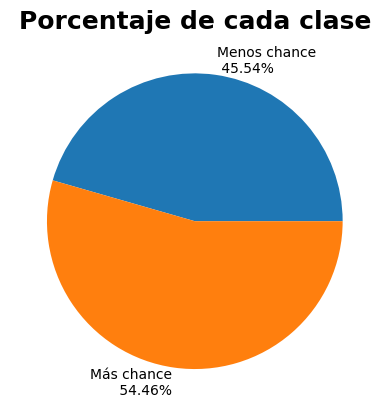

In [ ]:
# Gráfico de torta del porcentaje de cada clase
clases = np.array([data_heart[data_heart.output == 0.0].shape[0],
                   data_heart[data_heart.output == 1.0].shape[0]]
                  )

# Creando las leyendas del gráfico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Menos chance\n ' + labels[0]
labels[1] = 'Más chance\n ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Porcentaje de cada clase', fontsize=18, fontweight="bold")
plt.show()

---
$\textbf{COMENTARIO}$

----
Se presenta una distribución más o menos simétrica.

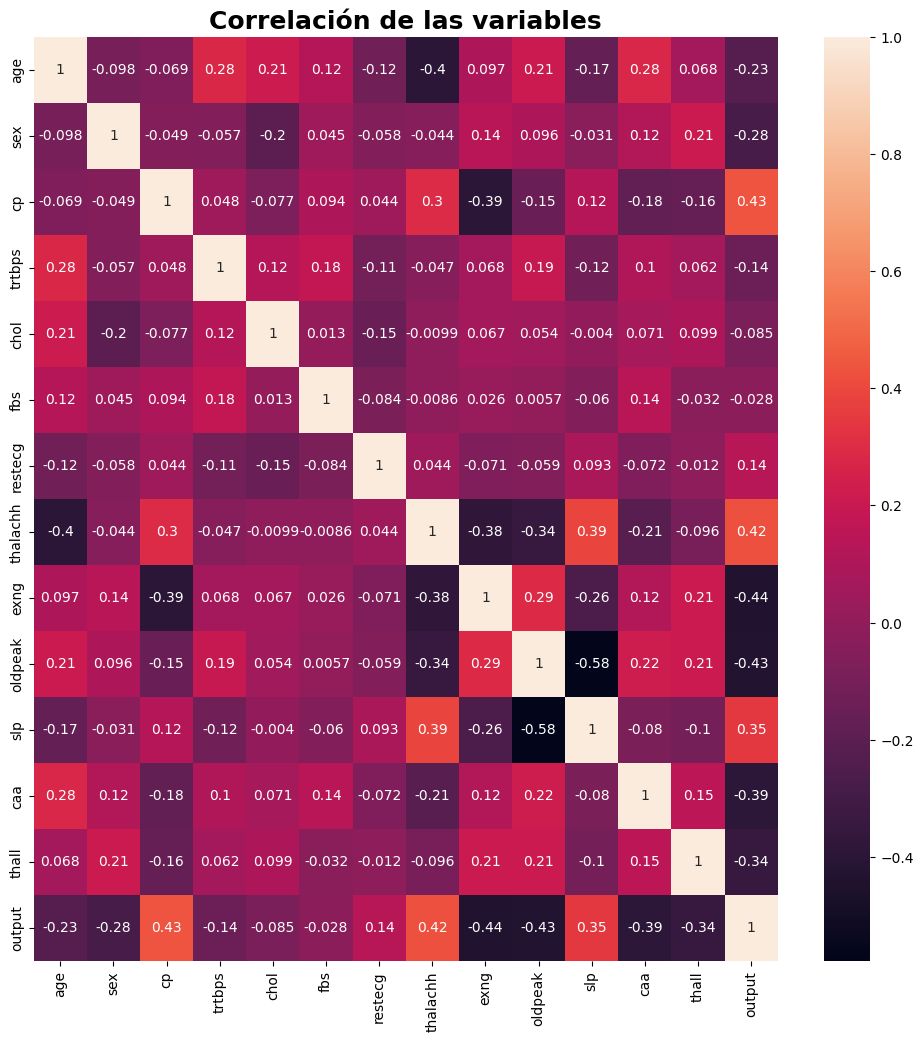

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_heart.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=18, fontweight="bold")
plt.show()

---
### Comentarios de la matriz de correlación
---

Considerando que la variable objetivo es la que indica si el paciente presenta un riesgo menor o mayor a sufrir un ataque cardìaco se obtienen estos comentarios acerca de la matriz:

+ 9 de las 13 variables presentan una correlación negativa con la variable objetivo.
+ 4 de las 13 variables presentan una correlación positiva con la variable objetivo.

Se revisa la correlación con la variable objetivo

In [ ]:
df_correlacion = pd.DataFrame(data_heart.corr()[13:].values.reshape(-1, 1), columns = ['correlacion'])
df_correlacion.index = data_heart.columns
df_correlacion.correlacion.sort_values(ascending = False)

,correlacion
output,1.000000
cp,0.433798
thalachh,0.421741
slp,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trtbps,-0.144931
age,-0.225439
sex,-0.280937


+ Existen 2 variables que presentan una correlación positiva superior a 0.4 con la variable objetivo.
+ Existen 2 variables que presentan una correlación negativa superior a -0.4.
+ Las cuatro variables pueden ser posibles predictoras del modelo, por lo que la línea base se va a construir en función de ellas.

In [ ]:
print("Mayor correlacion positiva : ",
    df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values)

print("Mayor correlacion negativa : ",
    df_correlacion.query("correlacion <= -0.4").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values,
    df_correlacion.query("correlacion <= -0.4").index.values)

Mayor correlacion positiva :  ['cp' 'thalachh']
Mayor correlacion negativa :  ['exng' 'oldpeak']


## Análisis de variables

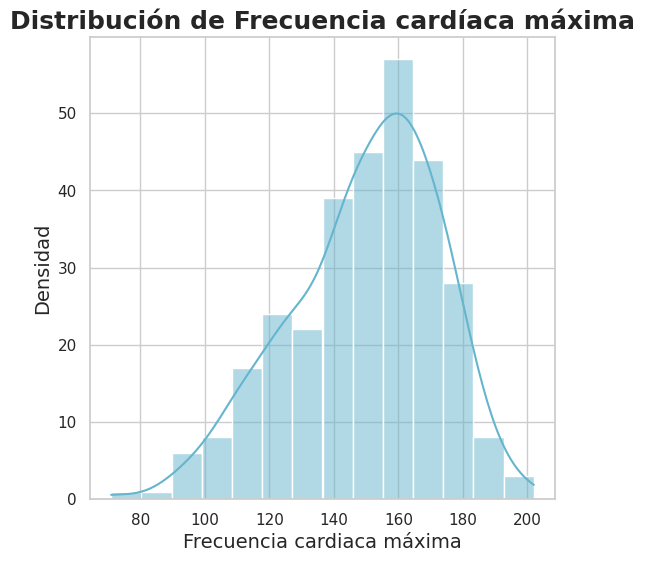

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['thalachh'], kde = True, color = 'c')
plt.title('Distribución de Frecuencia cardíaca máxima', fontsize = 18, fontweight="bold")
plt.xlabel("Frecuencia cardiaca máxima", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.thalachh.describe()).T

,count,mean,std,min,25%,50%,75%,max
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


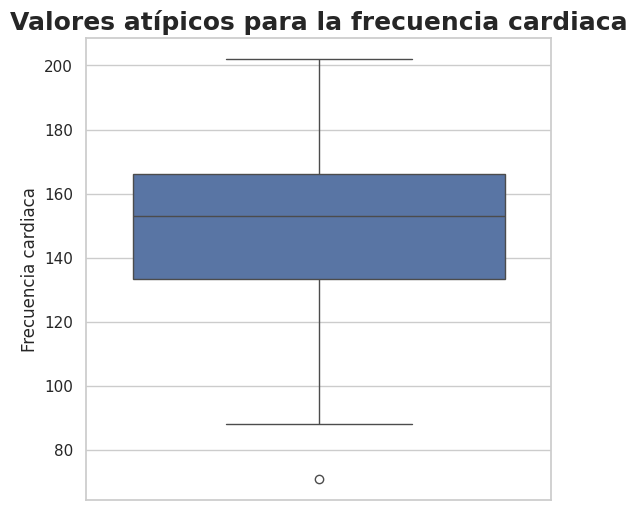

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la frecuencia cardiaca", fontsize=18, fontweight="bold")
plt.ylabel("Frecuencia cardiaca")
sns.boxplot(y='thalachh',data=data_heart);

---
### Comentarios de la frecuencia cardiaca
----

+ En promedio los pacientes presentan una frecuencia cardíaca de 149.6 latidos por minuto (lpm)
+ La frecuencia cardiaca máxima registrada es de 202 lpm
+ Se aprecia que existe un valor atípico que corresponde a la frecuencia cardíaca mínima (71 lpm)

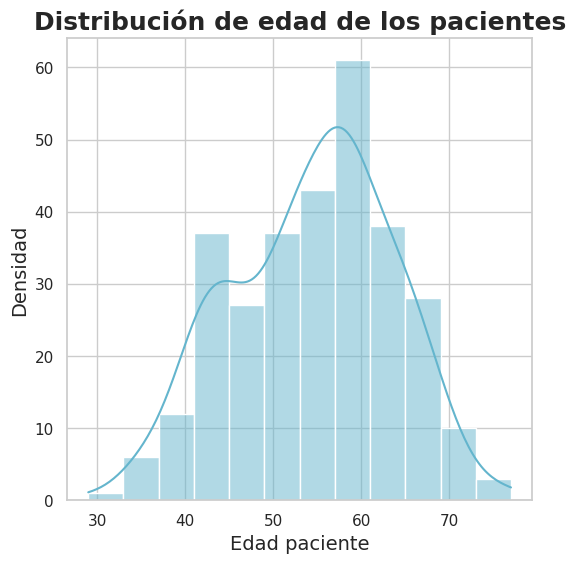

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['age'], kde = True, color = 'c')
plt.title('Distribución de edad de los pacientes', fontsize = 18, fontweight="bold")
plt.xlabel("Edad paciente", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.age.describe()).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0


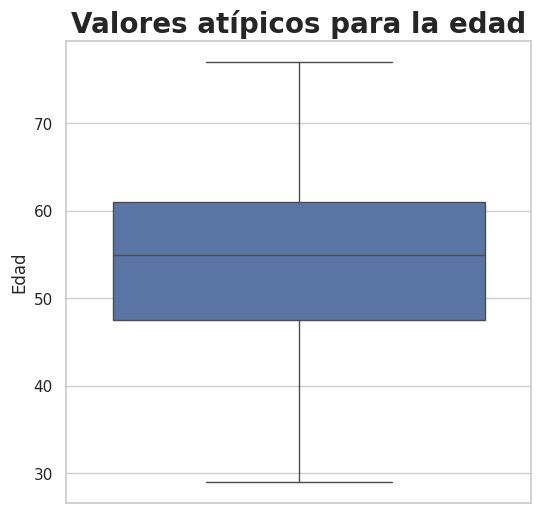

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para la edad", fontsize=20, fontweight="bold")
plt.ylabel("Edad")
sns.boxplot(y='age',data=data_heart);

---
### Comentarios acerca de la edad de los pacientes
---

+ Paciente con mayor edad tiene 77 años.
+ El 50% de los pacientes tiene 55 años o menos
+ El paciente joven tiene 29 años
+ El promedio de edad de los pacientes es de 54 años aproximadamente.
+ Inexistencia de valores atípicos (outliers)

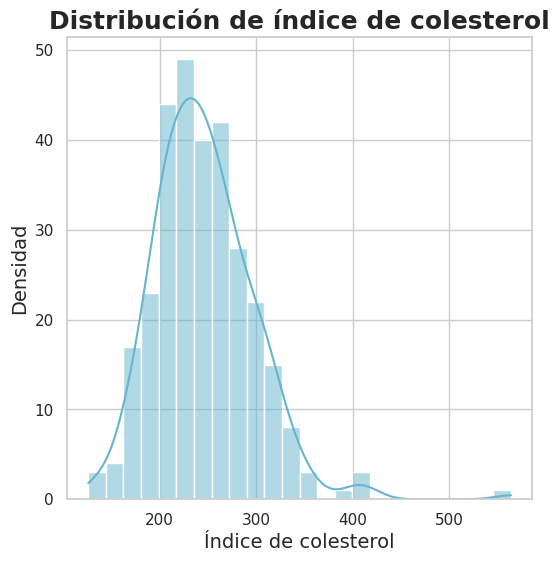

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(6, 6))
ax = sns.histplot(data_heart['chol'], kde = True, color = 'c')
plt.title('Distribución de índice de colesterol', fontsize = 18, fontweight="bold")
plt.xlabel("Índice de colesterol", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.show()

In [ ]:
pd.DataFrame(data_heart.chol.describe()).T

,count,mean,std,min,25%,50%,75%,max
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0


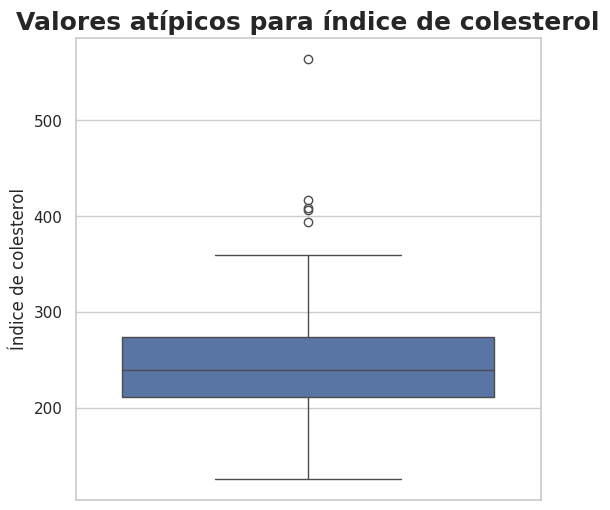

In [ ]:
plt.figure(figsize=(6,6))
plt.title("Valores atípicos para índice de colesterol", fontsize=18, fontweight="bold")
sns.boxplot(y='chol',data=data_heart)
plt.ylabel("Índice de colesterol")
plt.show()

In [ ]:
# Identifica los valores atìpicos
IQR = np.quantile(data_heart.chol, 0.75) - np.quantile(data_heart.chol, 0.25)
limite = np.quantile(data_heart.chol, 0.75) + IQR*1.5
data_heart[data_heart.chol > limite]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


---
### Comentarios acerca del índice de colesterol
---

+ El valor máximo del índice es de 546 mg/dl (miligramos por decilitro).
+ El promedio es del 246 mg/dl aproximadamente
+ El 75% de los pacientes presenta un índice igual o inferior a 274.5 mg/dl
+ Existen valor atípicos (outliers)

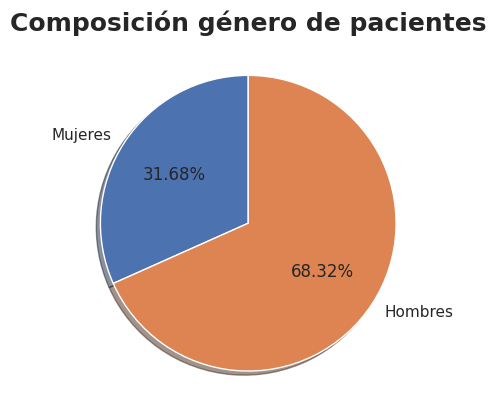

In [ ]:
clases = np.array([data_heart[data_heart.sex == 0].shape[0],
                   data_heart[data_heart.sex == 1].shape[0]])
labels = ['Mujeres', 'Hombres']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Composición género de pacientes', fontsize=18, fontweight="bold")
plt.show()

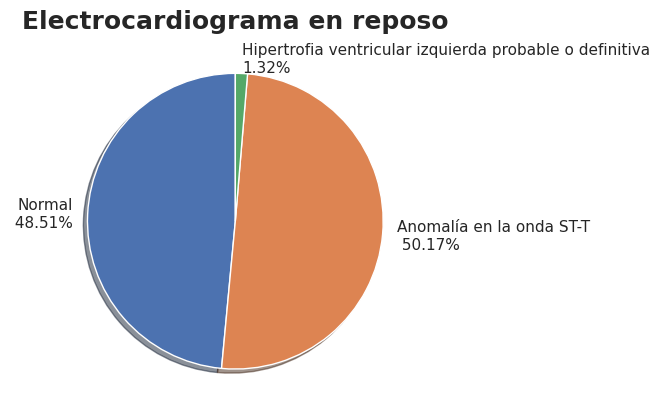

In [ ]:
clases = np.array([data_heart[data_heart.restecg == 0].shape[0],
                   data_heart[data_heart.restecg == 1].shape[0],
                   data_heart[data_heart.restecg == 2].shape[0]
                   ])
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'Normal\n ' + labels[0]
labels[1] = 'Anomalía en la onda ST-T\n ' + labels[1]
labels[2] = 'Hipertrofia ventricular izquierda probable o definitiva\n' + labels[2]

plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Electrocardiograma en reposo', fontsize=18, fontweight="bold")
plt.show()

In [ ]:
# Totales por resultado del electrocardiograma en reposo
index = ['Normal', 'Anomalía en la onda ST-T', 'Hipertrofia ventricular izquierda probable o definitiva']
print(pd.DataFrame(data=data_heart.groupby("restecg").size().values.reshape(3,-1),
        index = index, columns = ['Frecuencia']))

                                                    Frecuencia
Normal                                                     147
Anomalía en la onda ST-T                                   152
Hipertrofia ventricular izquierda probable o de...           4


In [ ]:
# Totales por tipo de dolor de pecho
index = ['Angina típica', 'Angina atípica', 'Dolor no anginoso', 'Asintomático']
print(pd.DataFrame(data=data_heart.groupby("cp").size().values.reshape(len(index),-1),
        index = index, columns = ['Frecuencia']))

                   Frecuencia
Angina típica             143
Angina atípica             50
Dolor no anginoso          87
Asintomático               23


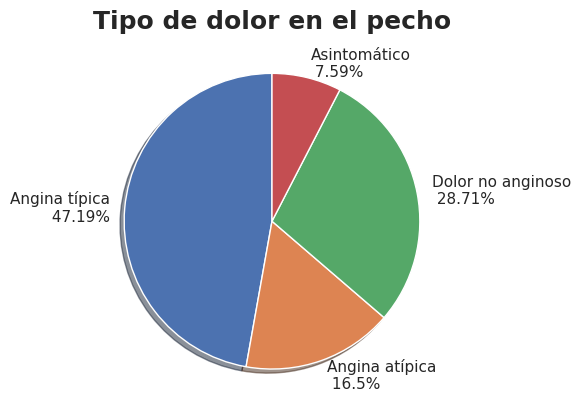

In [ ]:
clases = np.array([data_heart[data_heart.cp == 0].shape[0],
                   data_heart[data_heart.cp == 1].shape[0],
                   data_heart[data_heart.cp == 2].shape[0],
                   data_heart[data_heart.cp == 3].shape[0]
                   ])
values_labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels = ['Angina típica\n ' + values_labels[0],
            'Angina atípica\n ' + values_labels[1],
            'Dolor no anginoso\n ' + values_labels[2],
            'Asintomático\n ' + values_labels[3]
            ]
plt.pie(clases, labels=labels,
        shadow=True, startangle=90)
plt.title('Tipo de dolor en el pecho', fontsize=18, fontweight="bold")
plt.show()

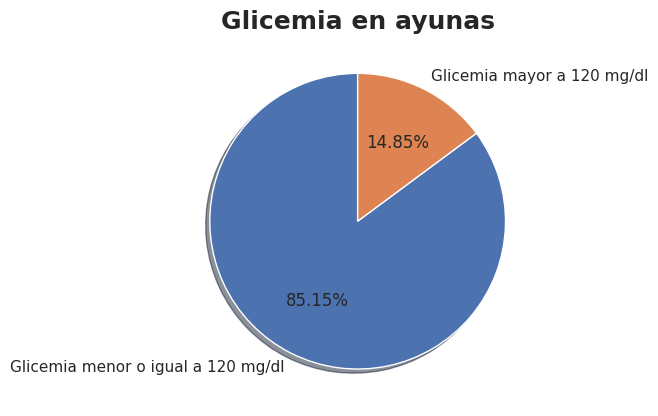

In [ ]:
clases = np.array([data_heart[data_heart.fbs == 0].shape[0],
                   data_heart[data_heart.fbs == 1].shape[0]])
labels = ['Glicemia menor o igual a 120 mg/dl', 'Glicemia mayor a 120 mg/dl']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('Glicemia en ayunas', fontsize=18, fontweight="bold")
plt.show()

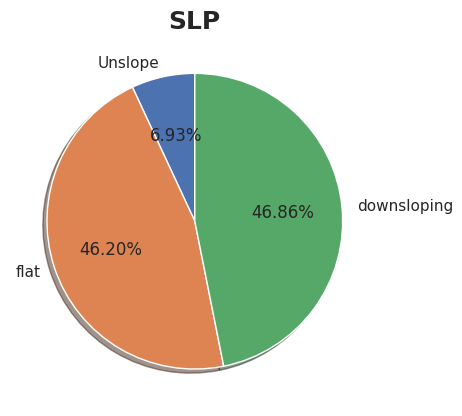

In [ ]:
clases = np.array([data_heart[data_heart.slp == 0].shape[0],
                   data_heart[data_heart.slp == 1].shape[0],
                   data_heart[data_heart.slp == 2].shape[0]
                   ])
labels = ['Unslope', 'flat', 'downsloping']
plt.pie(clases, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
plt.title('SLP', fontsize=18, fontweight="bold")
plt.show()

# Hipótesis

Determinar si un paciente tiene mayor o menor chance de sufrir un accidente cardíaco considerando ciertas características médicas del paciente. Características médicas que consideran aspectos como: edad, nivel de colesterol, presión arterial, presencia de dolor en el pecho, frecuencia cardíaca.

## Análisis preliminar

Antes de construir los posibles modelos de machine learning usando aprendizaje supervisado se realizarán algunos análisis preliminares sobre las variables.

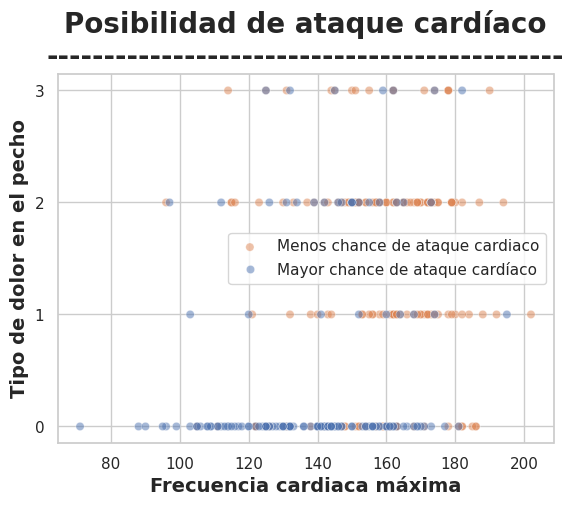

In [ ]:
sns.scatterplot(
    data = data_heart,
    x = "thalachh",
    y = "cp",
    hue = "output",
    alpha = 0.5
)
plt.legend(['Menos chance de ataque cardiaco','Mayor chance de ataque cardíaco'])
plt.yticks(range(0,4,1))
plt.xlabel("Frecuencia cardiaca máxima", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de dolor en el pecho", fontsize=14, fontweight="bold")
plt.title("Posibilidad de ataque cardíaco\n" + "-"*45, fontsize=20, fontweight = "bold");

---
$\textbf{COMENTARIO}$

---
+ Los pacientes que presentan dolor de pecho del tipo $\textit{angina típica}$ es más probable que sufran un ataque cardíaco (concentración de puntos azules en el valor 0 para el eje Y)

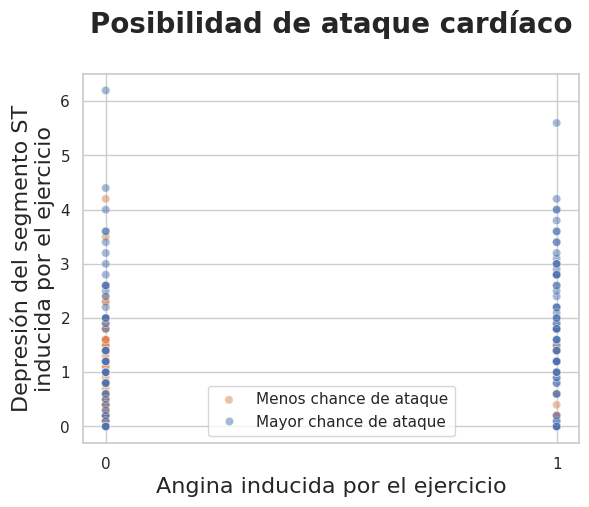

In [ ]:
sns.scatterplot(
    data = data_heart,
    x = "exng",
    y = "oldpeak",
    hue = "output",
    alpha = 0.5
)
plt.legend(['Menos chance de ataque','Mayor chance de ataque'])
plt.xticks(range(0,2,1))
plt.xlabel("Angina inducida por el ejercicio", fontsize=16)
plt.ylabel("Depresión del segmento ST\ninducida por el ejercicio", fontsize=16)
plt.title("Posibilidad de ataque cardíaco\n", fontsize=20, fontweight = "bold");

# Fase 4 - Modelamiento

Se construirá un modelo de clasificación que permita predecir si un paciente presenta mayor o menor chance de sufrir un ataque al corazón considerando las características médicas que se tienen.

In [ ]:
# Determina los datos con los cuales se trabajará
features = data_heart.drop(columns = ['output']).columns
X = data_heart[features]
y = data_heart.output

In [ ]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29,
                                                    shuffle=True, stratify = y)

In [ ]:
target_names = ['Menor chance', 'Mayor chance']

In [ ]:
def ver_matriz(matriz_x: np.array, target_names: np.array, ax, title="Matriz de confusión") -> None:
    """Visualiza una matriz de confusión en un subplot dado por ax."""
    clases = target_names
    group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten() / matriz_x.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(target_names), len(target_names))

    sns.heatmap(matriz_x, annot=labels, fmt='', cmap='Blues',
                xticklabels=clases, yticklabels=clases, ax=ax)

    ax.set_title(title, fontsize=12, fontweight="bold")
    ax.set_xlabel("PREDICCIÓN", fontsize=10)
    ax.set_ylabel("REAL", fontsize=10)

## Generación de modelos - Línea base

In [ ]:
# Diccionario para guardar los modelos entrenados
models = {
    'Logistic Regression': LogisticRegression(max_iter=4000),
    'Support Vector Machine' : SVC(kernel='linear'),
    'KNN' : KNeighborsClassifier(7),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=3, criterion = "entropy",
                                                       random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=50,
                                            criterion = "entropy", random_state=29)
}

In [ ]:
def generacion_modelos(models : dict, target_names : str,
                       X_train : pd.DataFrame, X_test : pd.DataFrame,
                       y_train : pd.Series, y_test : pd.Series):
  matrices = {}
  history = {}
  history_roc = {}
  history_report = {}
  for name, model in models.items():
    pipeline = Pipeline(steps=[('model', model)])
    pipeline.fit(X_train, y_train)
    # Guardar el modelo entrenado en el diccionario
    y_pred = pipeline.predict(X_test)
    # Guarda matriz para poder visualizar después
    matrices[name] = confusion_matrix(y_test, y_pred)
    # Guarda el accuracy
    history[name] = accuracy_score(y_test, y_pred)
    # Guarda el roc_auc
    history_roc[name] = roc_auc_score(y_test, y_pred)
    history_report[name] = classification_report(y_test, y_pred, target_names=target_names)
  return matrices, history, history_roc, history_report

In [ ]:
# Generación de los modelos
matrices, history, history_roc, history_report = generacion_modelos(models, target_names,
                                                                    X_train, X_test,
                                                                    y_train, y_test)

## Generación de variante de modelos

Ahora se prueba sólo considerando las variables con mayor correlación positiva y negativa obtenidas anteriormente. Esto es para ver si se puede mejorar lo que ya se tiene de base y tomar algunos de estos nuevos modelos como base.

In [ ]:
# Diccionario para guardar los modelos entrenados
models_a = {
    'Logistic Regression': LogisticRegression(max_iter=4000),
    'Support Vector Machine' : SVC(kernel='linear'),
    'KNN' : KNeighborsClassifier(7),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth=3,
                                                       criterion = "entropy",
                                                       random_state=29),
    'Random Forest': RandomForestClassifier(n_estimators=50,
                                            criterion = "entropy", random_state=29)
}

In [ ]:
# Recordamos las variables con mejor correlación
lst_features

array(['cp', 'thalachh', 'exng', 'oldpeak'], dtype=object)

In [ ]:
X_alt = data_heart[lst_features]
y_alt = data_heart.output
# Separa la data en entrenamiento y prueba
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_alt, y_alt, test_size=0.2,
            random_state = 29, stratify=y_alt, shuffle=True )

In [ ]:
# Genetación de los modelos
matrices_a, history_a, history_roc_a, history_report_a = generacion_modelos(models_a, target_names,
                                                                    X_train_a, X_test_a,
                                                                    y_train_a, y_test_a)

# Fase 5 - Evaluación

## Funciones útiles

In [ ]:
def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)


def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de pacientes {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de pacientes {positive_text} y que realmente lo son"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de efectividad la menor o mayor chance de sufrir un ataque"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion

## Modelos línea base

### Matriz de confusión

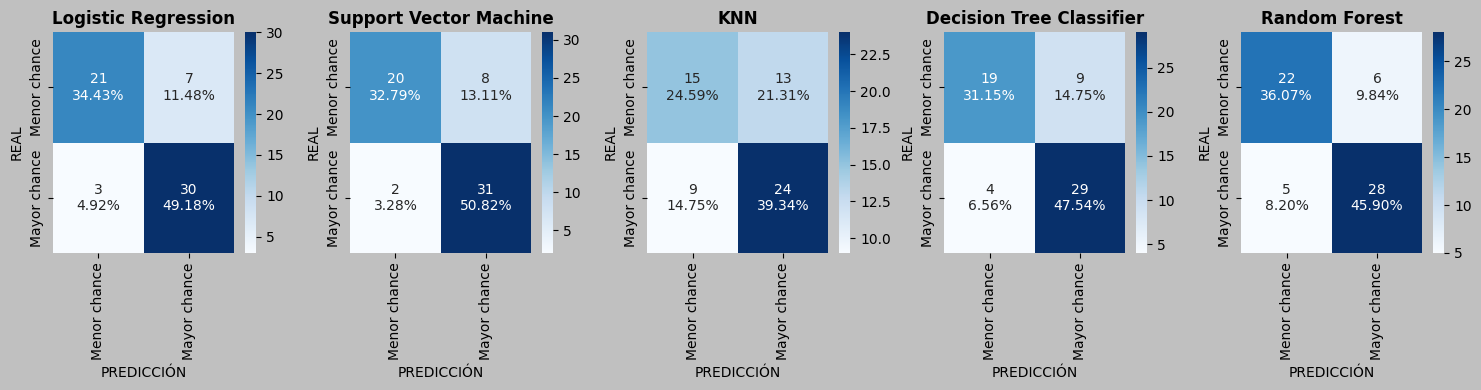

In [ ]:
# Muestra las 5 matrices en un solo gráfico
fig, axes = plt.subplots(1, 5, figsize=(15, 4), facecolor='silver')

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices.items()):
  ver_matriz(matriz, target_names, ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

### Reportes de clasificación

In [ ]:
all_precision = {}
all_recall = {}
all_f1 = {}
# Obtiene las métricas a partir de la matriz de confusión
for modelo, matriz in matrices.items():
  accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
  print(f"\n** Métricas desde la matriz de confusión de {modelo} **")
  print("\t{0:<15} = {1:.4f}".format("Precision",precision_manual))
  print("\t{0:<15} = {1:.4f}".format("Recall", recall_manual))
  print("\t{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
  print("\t{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual))
  print(f"\n** Interpretaciones de métricas de {modelo} **")
  r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual, precision_manual, accuracy_manual,"con mayor riesgo de sufrir un ataque")
  print("\t", r_interpretacion, "\n\t", p_interpretacion, "\n\t", a_interpretacion)
  all_precision[modelo] = precision_manual
  all_recall[modelo] = recall_manual
  all_f1[modelo] = f1_score_manual


** Métricas desde la matriz de confusión de Logistic Regression **
	Precision       = 0.8108
	Recall          = 0.9091
	F1-score        = 0.8571
	Accuracy        = 0.8361

** Interpretaciones de métricas de Logistic Regression **
	 Se han identificado el 90.91% de pacientes con mayor riesgo de sufrir un ataque 
	 Se han identificado un 81.08% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
	 El modelo acierta con un 83.61% de efectividad la menor o mayor chance de sufrir un ataque

** Métricas desde la matriz de confusión de Support Vector Machine **
	Precision       = 0.7949
	Recall          = 0.9394
	F1-score        = 0.8611
	Accuracy        = 0.8361

** Interpretaciones de métricas de Support Vector Machine **
	 Se han identificado el 93.94% de pacientes con mayor riesgo de sufrir un ataque 
	 Se han identificado un 79.49% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
	 El modelo acierta con un 83.61% de efectividad la menor o m

### Obtención del mejor modelo

In [ ]:
def get_bestModel(history : dict, models : dict):
  """ Retorna el mejor modelo y el mejor score considerando el history entregado """
  name_best_model, best_score = max(history.items(), key=itemgetter(1))
  best_model = models[name_best_model]
  return name_best_model, best_score, best_model

#### Accuracy

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history, orient='index', columns=['Accuracy']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Accuracy,0.836066,0.836066,0.639344,0.786885,0.819672


In [ ]:
name_best_model, best_score, best_model = get_bestModel(history, models)
print(f"Considerando 'accuracy' el mejor modelo es {name_best_model} con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'accuracy' el mejor modelo es Logistic Regression con un score de 0.8361
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


#### Precision

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_precision, orient='index', columns=['precision']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
precision,0.810811,0.794872,0.648649,0.763158,0.823529


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_precision, models)
print(f"Considerando 'precision' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")

print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'precision' el mejor modelo es 'Random Forest' con un score de 0.8235
--------------------------------------------------------------------------------
RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=29)
Entrenado con 
	['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


#### Recall

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_recall, orient='index', columns=['Recall']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Recall,0.909091,0.939394,0.727273,0.878788,0.848485


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_recall, models)
print(f"Considerando 'recall' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'recall' el mejor modelo es 'Support Vector Machine' con un score de 0.9394
--------------------------------------------------------------------------------
SVC(kernel='linear')
Entrenado con 
	['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


#### F1 score

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_f1, orient='index', columns=['F1 score']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
F1 score,0.857143,0.861111,0.685714,0.816901,0.835821


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_f1, models)
print(f"Considerando 'F1 score' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'F1 score' el mejor modelo es 'Support Vector Machine' con un score de 0.8611
--------------------------------------------------------------------------------
SVC(kernel='linear')
Entrenado con 
	['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


#### ROC AUC

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history_roc, orient='index', columns=['ROC_AUC']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
ROC_AUC,0.829545,0.82684,0.631494,0.77868,0.8171


In [ ]:
name_best_model, best_score, best_model = get_bestModel(history_roc, models)
print(f"Considerando 'ROC AUC' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'ROC AUC' el mejor modelo es 'Logistic Regression' con un score de 0.8295
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']


### Gráficos

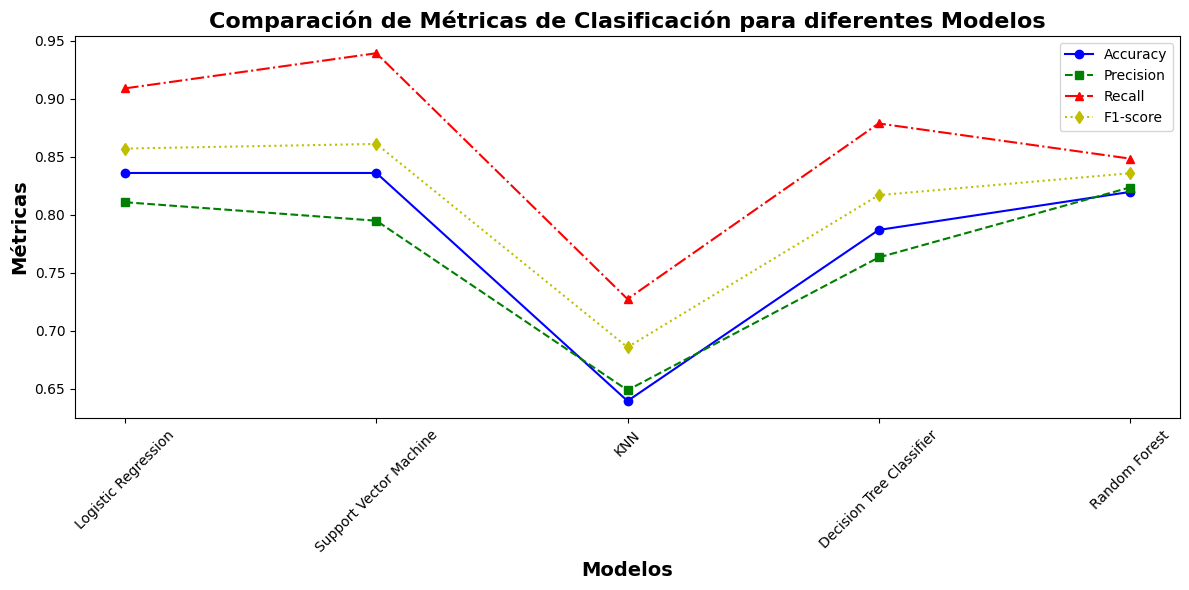

In [ ]:
# Nombres de los modelos
model_names = list(models.keys())

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de líneas para cada métrica
plt.plot(model_names, history.values(), marker='o', label='Accuracy', color='b', linestyle='-')
plt.plot(model_names, all_precision.values(), marker='s', label='Precision', color='g', linestyle='--')
plt.plot(model_names, all_recall.values(), marker='^', label='Recall', color='r', linestyle='-.')
plt.plot(model_names, all_f1.values(), marker='d', label='F1-score', color='y', linestyle=':')

# Etiquetas y título
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Métricas', fontsize=14, fontweight="bold")
plt.title('Comparación de Métricas de Clasificación para diferentes Modelos', fontsize=16,
          fontweight="bold")
plt.xticks(rotation=45)
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


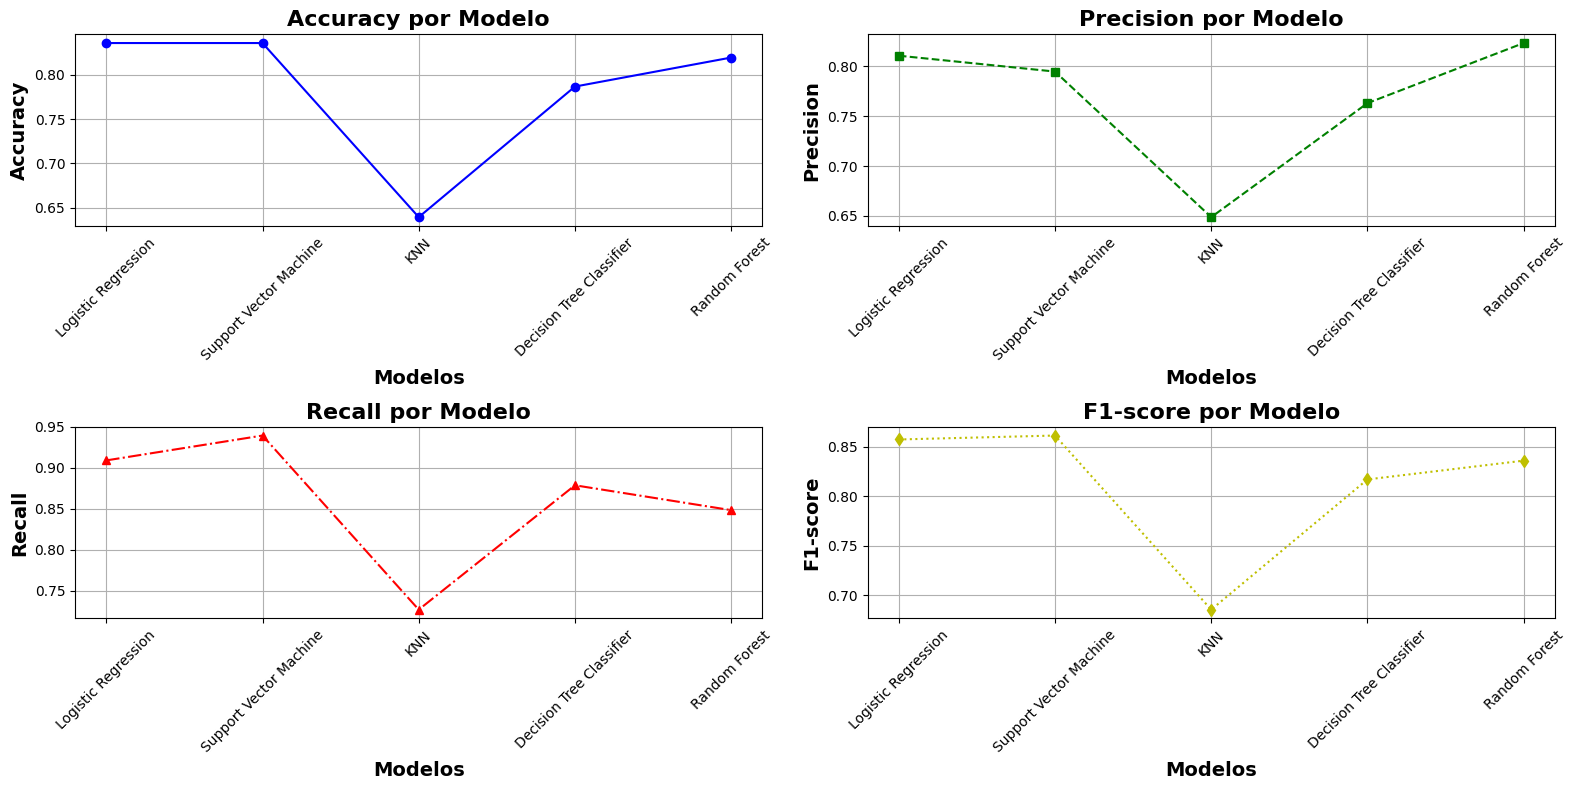

In [ ]:
# Configuración del gráfico y tamaño de la figura
plt.figure(figsize=(16, 8))

# Gráfico de líneas para Accuracy
plt.subplot(2, 2, 1)
plt.plot(model_names, history.values(), marker='o', color='b', linestyle='-', label='Accuracy')
plt.title('Accuracy por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para Precision
plt.subplot(2, 2, 2)
plt.plot(model_names, all_precision.values(), marker='s', color='g', linestyle='--', label='Precision')
plt.title('Precision por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Precision', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para Recall
plt.subplot(2, 2, 3)
plt.plot(model_names, all_recall.values(), marker='^', color='r', linestyle='-.', label='Recall')
plt.title('Recall por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Recall', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para F1-score
plt.subplot(2, 2, 4)
plt.plot(model_names, all_f1.values(), marker='d', color='y', linestyle=':', label='F1-score')
plt.title('F1-score por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('F1-score', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()



Las interpretaciones consideran la clase positiva a aquella que está rotulada como $\textbf{(mayor chance de sufrir ataque cardíaco)}$

In [ ]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97


In [ ]:
def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]

In [ ]:
# Obtiene el valor del área bajo la curva
for modelo, metric_value in history_roc.items():
  print("ROC_AUC score {} : {:.2f} -> {}".format(modelo, metric_value,
                                               view_rango(rangos, metric_value)))

ROC_AUC score Logistic Regression : 0.83 -> Bueno
ROC_AUC score Support Vector Machine : 0.83 -> Bueno
ROC_AUC score KNN : 0.63 -> Regular
ROC_AUC score Decision Tree Classifier : 0.78 -> Bueno
ROC_AUC score Random Forest : 0.82 -> Bueno


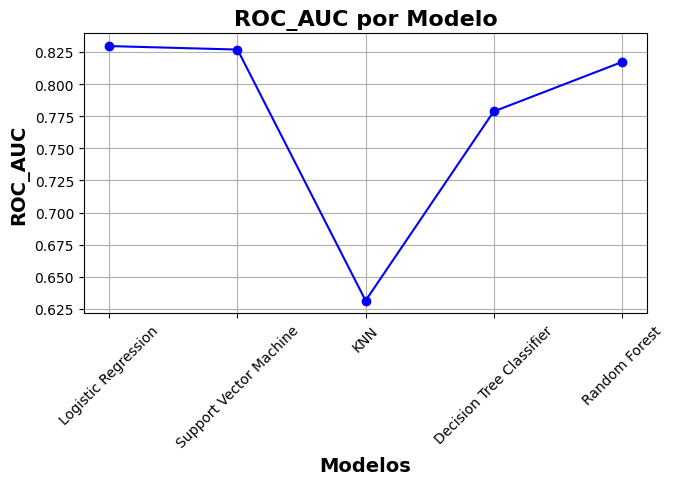

In [ ]:
# Configuración del gráfico y tamaño de la figura
plt.figure(figsize=(16, 8))

# Gráfico de líneas para los puntajes
plt.subplot(2, 2, 1)
plt.plot(model_names, history_roc.values(), marker='o', color='b', linestyle='-', label='ROC AUC')
plt.title('ROC_AUC por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('ROC_AUC', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history_roc, orient='index', columns=['ROC_AUC']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
ROC_AUC,0.829545,0.82684,0.631494,0.77868,0.8171


## Variante del modelo base



### Matriz de confusión

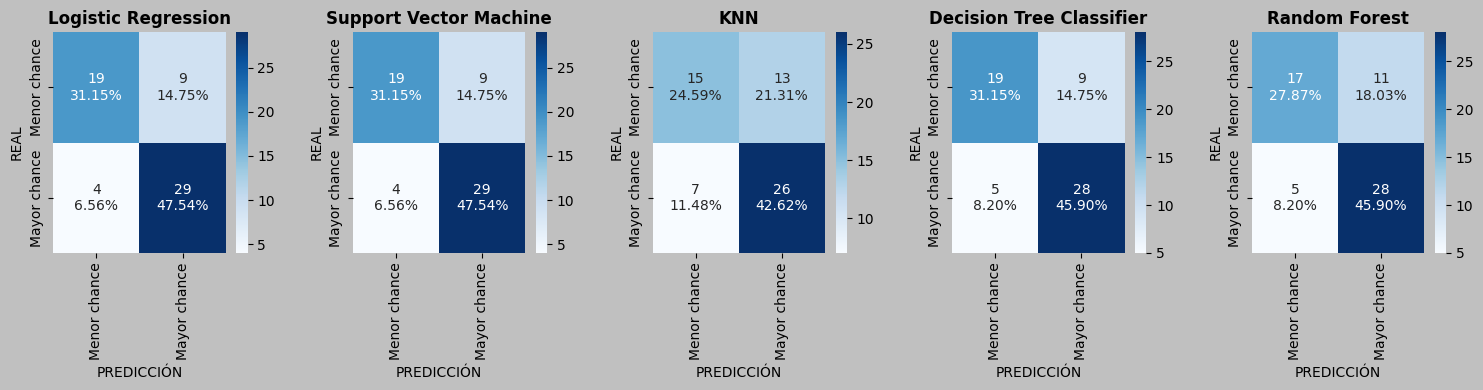

In [ ]:
# Muestra las 5 matrices en un solo gráfico
fig, axes = plt.subplots(1, 5, figsize=(15, 4), facecolor='silver')

# Iterar sobre las matrices y mostrarlas en los subplots
for ax, (nombre_modelo, matriz) in zip(axes.flat, matrices_a.items()):
  ver_matriz(matriz, target_names, ax, title=nombre_modelo)

plt.tight_layout()
plt.show()

### Reportes de clasificación

In [ ]:
all_precision_a = {}
all_recall_a = {}
all_f1_a = {}
# Obtiene las métricas a partir de la matriz de confusión
for modelo, matriz in matrices_a.items():
  accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
  print(f"\n** Métricas desde la matriz de confusión de {modelo} **")
  print("\t{0:<15} = {1:.4f}".format("Precision",precision_manual))
  print("\t{0:<15} = {1:.4f}".format("Recall", recall_manual))
  print("\t{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
  print("\t{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual))
  print(f"\n** Interpretaciones de métricas de {modelo} **")
  r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual, precision_manual, accuracy_manual,"con mayor riesgo de sufrir un ataque")
  print("\t", r_interpretacion, "\n\t", p_interpretacion, "\n\t", a_interpretacion)
  all_precision_a[modelo] = precision_manual
  all_recall_a[modelo] = recall_manual
  all_f1_a[modelo] = f1_score_manual


** Métricas desde la matriz de confusión de Logistic Regression **
	Precision       = 0.7632
	Recall          = 0.8788
	F1-score        = 0.8169
	Accuracy        = 0.7869

** Interpretaciones de métricas de Logistic Regression **
	 Se han identificado el 87.88% de pacientes con mayor riesgo de sufrir un ataque 
	 Se han identificado un 76.32% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
	 El modelo acierta con un 78.69% de efectividad la menor o mayor chance de sufrir un ataque

** Métricas desde la matriz de confusión de Support Vector Machine **
	Precision       = 0.7632
	Recall          = 0.8788
	F1-score        = 0.8169
	Accuracy        = 0.7869

** Interpretaciones de métricas de Support Vector Machine **
	 Se han identificado el 87.88% de pacientes con mayor riesgo de sufrir un ataque 
	 Se han identificado un 76.32% de pacientes con mayor riesgo de sufrir un ataque y que realmente lo son 
	 El modelo acierta con un 78.69% de efectividad la menor o m

### Obtención del mejor modelo

#### Accuracy

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history_a, orient='index', columns=['Accuracy']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Accuracy,0.786885,0.786885,0.672131,0.770492,0.737705


In [ ]:
name_best_model, best_score, best_model = get_bestModel(history_a, models_a)
print(f"Considerando 'accuracy' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'accuracy' el mejor modelo es 'Logistic Regression' con un score de 0.7869
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['cp' 'thalachh' 'exng' 'oldpeak']


#### Precision

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_precision_a, orient='index', columns=['precision']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
precision,0.763158,0.763158,0.666667,0.756757,0.717949


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_precision_a, models_a)
print(f"Considerando 'precision' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'precision' el mejor modelo es 'Logistic Regression' con un score de 0.7632
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['cp' 'thalachh' 'exng' 'oldpeak']


#### Recall

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_recall_a, orient='index', columns=['Recall']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
Recall,0.878788,0.878788,0.787879,0.848485,0.848485


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_recall_a, models_a)
print(f"Considerando 'recall' el mejor modelo es '{best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'recall' el mejor modelo es 'LogisticRegression(max_iter=4000)' con un score de 0.8788
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['cp' 'thalachh' 'exng' 'oldpeak']


#### F1 score

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(all_f1_a, orient='index', columns=['F1 score']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
F1 score,0.816901,0.816901,0.722222,0.8,0.777778


In [ ]:
name_best_model, best_score, best_model = get_bestModel(all_f1_a, models_a)
print(f"Considerando 'F1 score' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'F1 score' el mejor modelo es 'Logistic Regression' con un score de 0.8169
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['cp' 'thalachh' 'exng' 'oldpeak']


#### ROC_AUC

In [ ]:
# Visualiza como una tabla
pd.DataFrame.from_dict(history_roc_a, orient='index', columns=['ROC_AUC']).T

,Logistic Regression,Support Vector Machine,KNN,Decision Tree Classifier,Random Forest
ROC_AUC,0.77868,0.77868,0.661797,0.763528,0.727814


In [ ]:
name_best_model, best_score, best_model = get_bestModel(history_roc_a, models_a)
print(f"Considerando 'ROC AUC' el mejor modelo es '{name_best_model}' con un score de {best_score:.4f}")
print("-"*80)
print(best_model)
print(f"Entrenado con \n\t{best_model.feature_names_in_}")

Considerando 'ROC AUC' el mejor modelo es 'Logistic Regression' con un score de 0.7787
--------------------------------------------------------------------------------
LogisticRegression(max_iter=4000)
Entrenado con 
	['cp' 'thalachh' 'exng' 'oldpeak']


### Gráficos

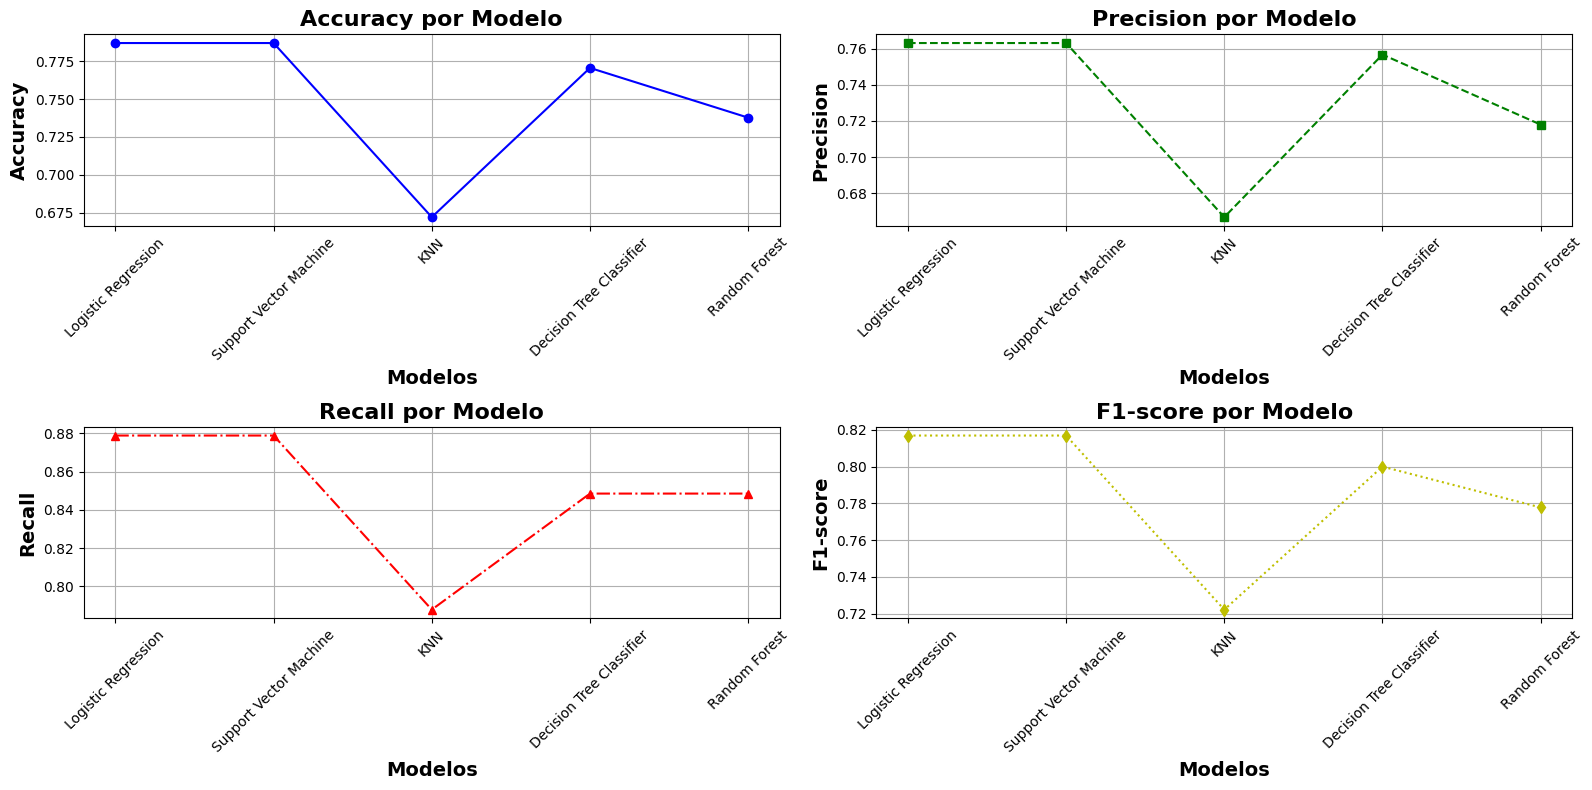

In [ ]:
# Configuración del gráfico y tamaño de la figura
plt.figure(figsize=(16, 8))

# Gráfico de líneas para Accuracy
plt.subplot(2, 2, 1)
plt.plot(model_names, history_a.values(), marker='o', color='b', linestyle='-', label='Accuracy')
plt.title('Accuracy por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Accuracy', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para Precision
plt.subplot(2, 2, 2)
plt.plot(model_names, all_precision_a.values(), marker='s', color='g', linestyle='--', label='Precision')
plt.title('Precision por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Precision', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para Recall
plt.subplot(2, 2, 3)
plt.plot(model_names, all_recall_a.values(), marker='^', color='r', linestyle='-.', label='Recall')
plt.title('Recall por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('Recall', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Gráfico de líneas para F1-score
plt.subplot(2, 2, 4)
plt.plot(model_names, all_f1_a.values(), marker='d', color='y', linestyle=':', label='F1-score')
plt.title('F1-score por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('F1-score', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

# Ajustar el diseño para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar los gráficos
plt.show()

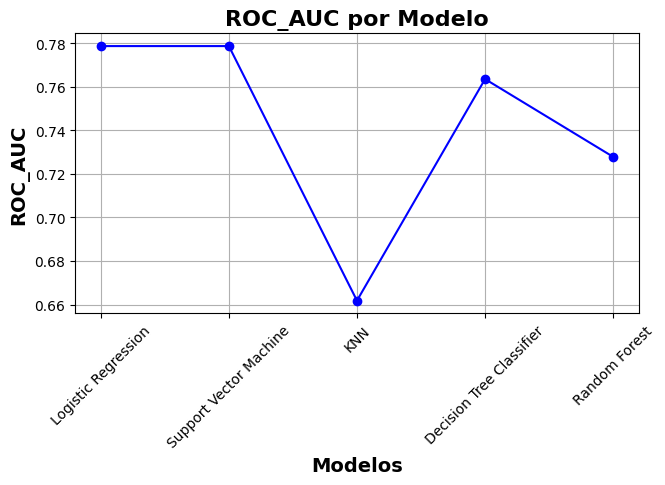

In [ ]:
# Configuración del gráfico y tamaño de la figura
plt.figure(figsize=(16, 8))

# Gráfico de líneas para roc_auc
plt.subplot(2, 2, 1)
plt.plot(model_names, history_roc_a.values(), marker='o', color='b', linestyle='-', label='ROC AUC')
plt.title('ROC_AUC por Modelo', fontsize=16, fontweight="bold")
plt.xlabel('Modelos', fontsize=14, fontweight="bold")
plt.ylabel('ROC_AUC', fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid()

In [ ]:
# Obtiene el valor del área bajo la curva
for modelo, metric_value in history_roc_a.items():
  print("ROC_AUC score {} : {:.2f} -> {}".format(modelo, metric_value,
                                               view_rango(rangos, metric_value)))

ROC_AUC score Logistic Regression : 0.78 -> Bueno
ROC_AUC score Support Vector Machine : 0.78 -> Bueno
ROC_AUC score KNN : 0.66 -> Regular
ROC_AUC score Decision Tree Classifier : 0.76 -> Bueno
ROC_AUC score Random Forest : 0.73 -> Regular


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07f23d1d-551e-4d12-aca9-35e44a5bac4b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>